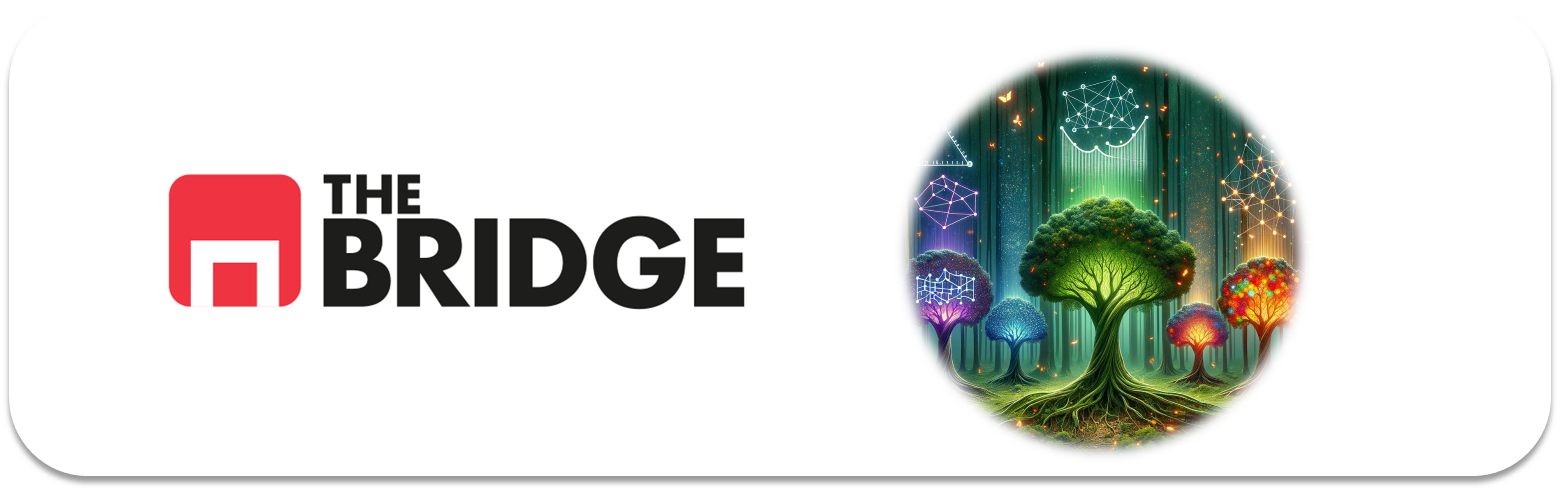

## PRACTICA OBLIGATORIA: **Arboles de Decisión y Ajuste de hiperparámetros**

* La práctica obligatoria de esta unidad consiste en encontrar el mejor modelo para resolver un problema de predicción de si los destinatarios de una campaña de marketing adquirirán un producto concreto. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt



### Descripción

En el directorio data encontrarás un dataset que contiene datos relacionados con campañas de marketing directo de una institución bancaria portuguesa (es el dataset "Bank Marketing" de la UCI Machine Learning Repository). Los datos se recopilaron de campañas de marketing telefónico, donde el objetivo principal era predecir si el cliente se suscribiría a un depósito a plazo.

La práctica consiste en completar el proceso de creación de un modelo basado en árboles de decisión que permita predecir si un cliente (dadas unas características similares a las del dataset) "comprará" el depósito a plazo. Sigue los pasos necesarios de un proceso de ML para crear el modelo, optimizar sus hiperparámetros, comparar los resultados de esa optimización con una regresión logística (sin optimizar, con sus hiperparámetros por defecto) y finalmente evaluarlo contra test y hacer una pequeña valoración del resultado obtenido.

Tendrás que hacer la limpieza, split, minieda, selección, tratamiento, primeros entrenamientos, optimización, comparación y evaluación según tu mejor criterio. Eso sí, es obligatorio:
- Identificar el target y analizar su distribución
- Realizar una optimización de hiperparámetros, escogiendo un grid medianemante razonado
- Comparar con el modelo baseline
- Evaluar contra test

AYUDA: La dirección del banco nos proporciona estas notas (en inglés):

 
   **bank client data:**  
   1 - age (numeric)  
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services")   
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)  
   4 - education (categorical: "unknown","secondary","primary","tertiary")  
   5 - default: has credit in default? (binary: "yes","no")  
   6 - balance: average yearly balance, in euros (numeric)   
   7 - housing: has housing loan? (binary: "yes","no")  
   8 - loan: has personal loan? (binary: "yes","no")   

   **related with the last contact of the current campaign:**  
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular")   
  10 - day: last contact day of the month (numeric)  
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")  
  12 - duration: last contact duration, in seconds (numeric)    

   **other attributes:**  
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)  
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)  
  15 - previous: number of contacts performed before this campaign and for this client (numeric)  
  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  

In [2]:
#Importacion de los datos

data = pd.read_csv('./data/bank-full.csv', sep=';')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [3]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
numerical = data.select_dtypes(include="number").columns.tolist()
categorical = data.select_dtypes(exclude="number").columns.tolist()

In [5]:
#Representacion grafica de los datos

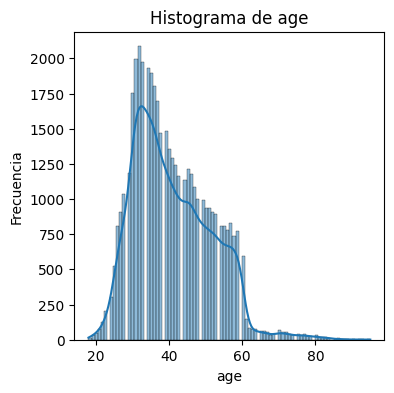

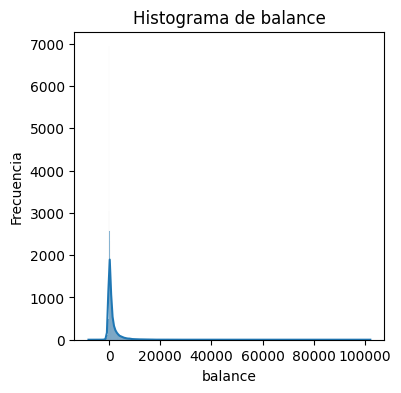

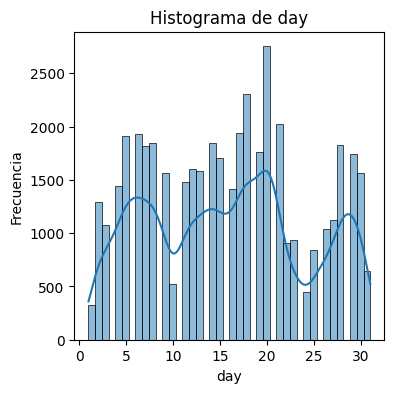

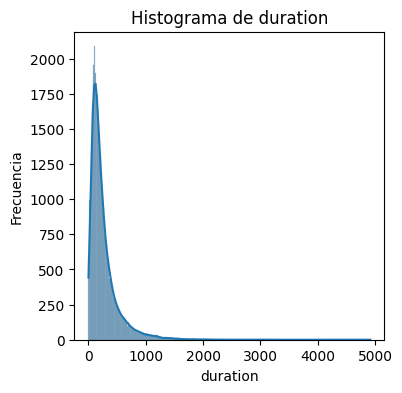

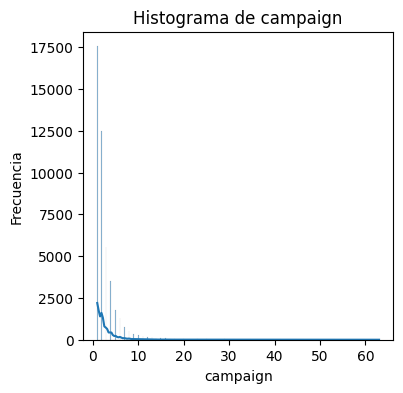

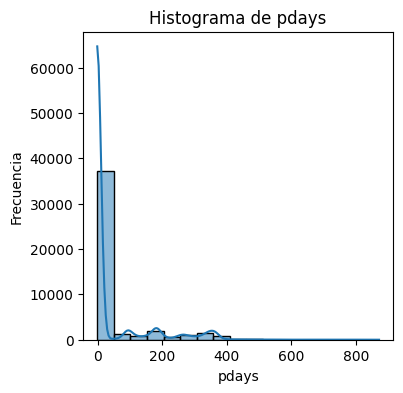

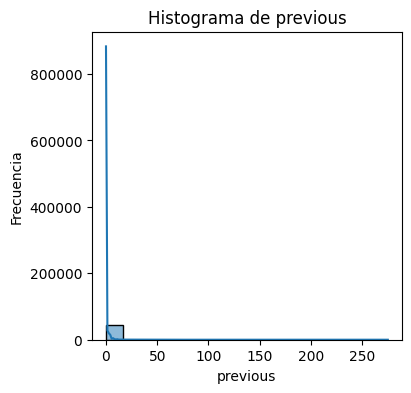

In [6]:
for column in numerical:
    plt.figure(figsize=(4, 4))
    sns.histplot(data[column], kde=True)
    plt.title(f'Histograma de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.show()

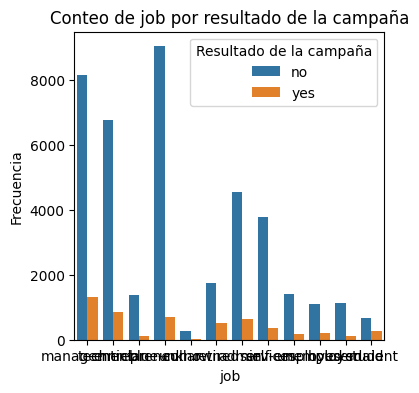

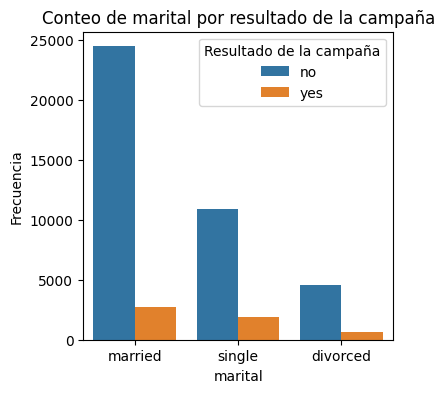

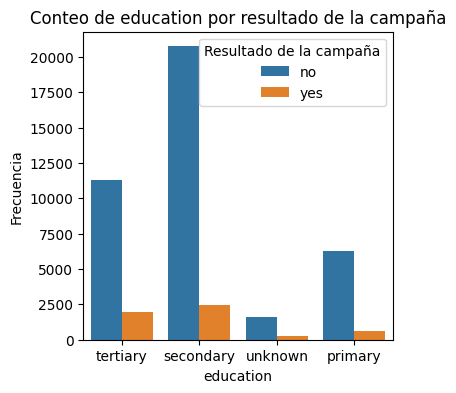

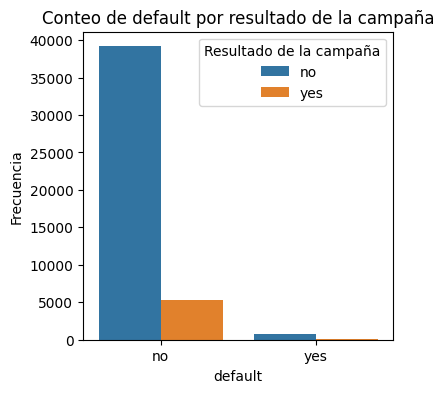

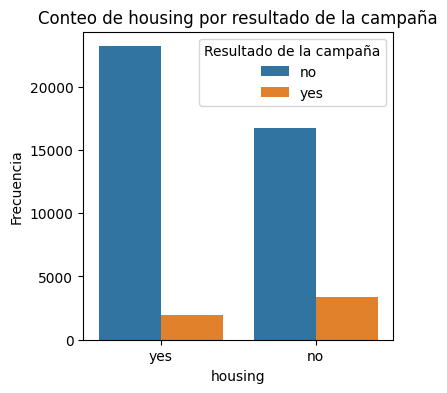

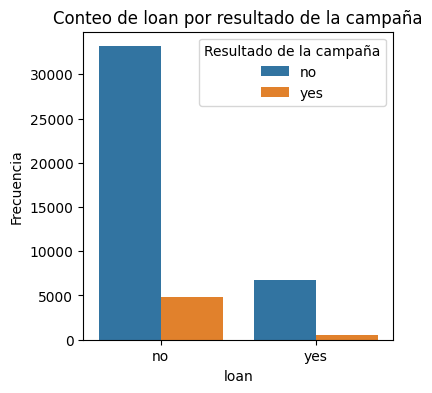

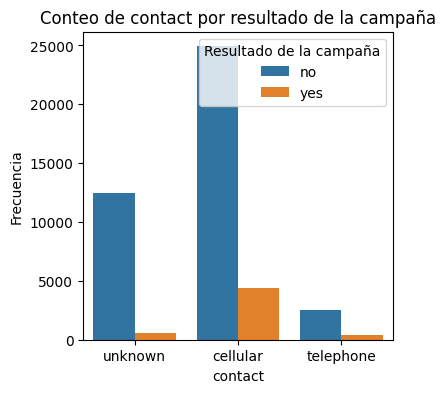

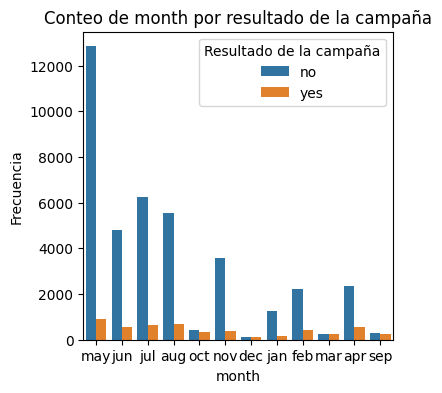

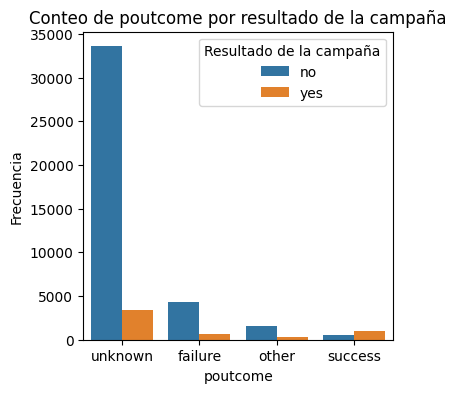

C:\Users\sergi\AppData\Local\Temp\ipykernel_9752\4085728345.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Resultado de la campaña')


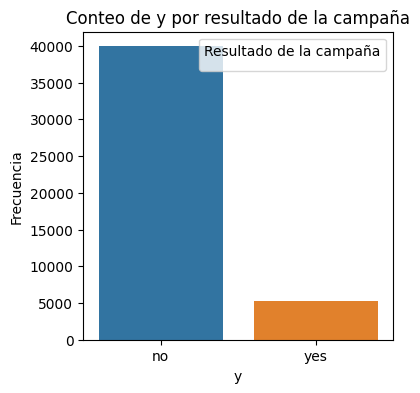

In [7]:
for column in categorical:
    plt.figure(figsize=(4, 4))
    sns.countplot(data=data, x=column, hue='y')
    plt.title(f'Conteo de {column} por resultado de la campaña')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.legend(title='Resultado de la campaña')
    plt.show()

In [8]:
correlation_matrix = data[numerical].corr()
correlation_matrix


,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


In [9]:
#No parece haber mucha correlacion entre variables numericas, por lo que podemos mantenerlas todas
#Parece haber desbalanceo de clases en varias variables categoricas, incluyendo la variable target ("y"), por lo que habrá que tenerlo en cuenta

Pasamos ahora a crear los dummies y dividir los datos en Train y Test

In [10]:
categorical.remove('y')
# Hacemos un One Hot Encoding de las variables categóricas usando pandas
data_encoded = pd.get_dummies(data, columns=categorical, drop_first=True)

# Dividimos los datos en variables independientes (X) y dependientes (y)
X = data_encoded.drop('y', axis=1)
y = data_encoded['y']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

Creamos los dos modelos como se indica en el enunciado: Uno de regresión logística sin optimizar para usar como baseline y otro de árbol de decisión

In [11]:
#Modelo baseline: Regresión logística sin optimización de hiperparámetros
logistic_model = LogisticRegression(max_iter=10000)
logistic_model.fit(X_train, y_train)

#Predicciones y evaluación del modelo baseline
y_pred_logistic = logistic_model.predict(X_test)

#Modelo optimizado: Árbol de decisión con GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 3, 5, 7, 10],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10]
}

grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid, cv=5, n_jobs=-1, scoring="accuracy")
grid_search.fit(X_train, y_train)

#Mejor modelo de árbol de decisión
best_tree_model = grid_search.best_estimator_

#Predicciones y evaluación del modelo optimizado
y_pred_tree = best_tree_model.predict(X_test)


c:\Users\sergi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\sergi\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [12]:
print(grid_search.best_params_)

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [13]:
#Evaluamos el modelo baseline
print("Evaluación del modelo baseline (Regresión Logística):")
print(classification_report(y_test, y_pred_logistic))
print(confusion_matrix(y_test, y_pred_logistic))

Evaluación del modelo baseline (Regresión Logística):
              precision    recall  f1-score   support

          no       0.92      0.98      0.95     11977
         yes       0.65      0.35      0.45      1587

    accuracy                           0.90     13564
   macro avg       0.79      0.66      0.70     13564
weighted avg       0.89      0.90      0.89     13564

[[11685   292]
 [ 1035   552]]


In [14]:
#Evaluamos el modelo optimizado
print("Evaluación del modelo optimizado (Árbol de Decisión):")
print(classification_report(y_test, y_pred_tree))
print(confusion_matrix(y_test, y_pred_tree))

Evaluación del modelo optimizado (Árbol de Decisión):
              precision    recall  f1-score   support

          no       0.92      0.97      0.94     11977
         yes       0.59      0.37      0.46      1587

    accuracy                           0.90     13564
   macro avg       0.76      0.67      0.70     13564
weighted avg       0.88      0.90      0.89     13564

[[11573   404]
 [  996   591]]


No parece haber una gran mejora entre ambos modelos, pues obtienen una precision media idéntica. Ambos fallan al detectar la clase "yes".   
Esto puede deberse a que es una clase con menos representación, por lo que el programa tiende a dar falsos negativos.   
Habría que probar a hacer técnicas de oversampling para aumentar la representación de la clase menos frecuente

In [21]:
pd.DataFrame(best_tree_model.feature_importances_, index = best_tree_model.feature_names_in_, columns = ['importance']).sort_values('importance', ascending=False)

,importance
duration,0.420238
poutcome_success,0.168649
contact_unknown,0.070398
day,0.049744
housing_yes,0.037983
pdays,0.033787
age,0.027941
balance,0.027104
month_oct,0.018882
month_jul,0.018818


Parece que hay features que tienen poca o nula importancia. Vamos a eliminar las 10 últimas a ver si el modelo mejora

In [22]:
columns_to_delete = pd.DataFrame(best_tree_model.feature_importances_, index = best_tree_model.feature_names_in_, columns = ['importance']).sort_values('importance', ascending=False).iloc[-10:-1].index.tolist()

In [23]:
X = data_encoded.drop('y', axis=1).drop(columns_to_delete, axis=1)
y = data_encoded['y']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [24]:
#Modelo baseline: Regresión logística sin optimización de hiperparámetros
logistic_model = LogisticRegression(max_iter=10000)
logistic_model.fit(X_train, y_train)

#Predicciones y evaluación del modelo baseline
y_pred_logistic = logistic_model.predict(X_test)

#Modelo optimizado: Árbol de decisión con GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 3, 5, 7, 10],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10]
}

grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid, cv=5, n_jobs=-1, scoring="accuracy")
grid_search.fit(X_train, y_train)

#Mejor modelo de árbol de decisión
best_tree_model = grid_search.best_estimator_

#Predicciones y evaluación del modelo optimizado
y_pred_tree = best_tree_model.predict(X_test)

c:\Users\sergi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
#Evaluamos el modelo baseline
print("Evaluación del modelo baseline (Regresión Logística):")
print(classification_report(y_test, y_pred_logistic))
print(confusion_matrix(y_test, y_pred_logistic))

Evaluación del modelo baseline (Regresión Logística):
              precision    recall  f1-score   support

          no       0.92      0.98      0.95     11977
         yes       0.65      0.35      0.46      1587

    accuracy                           0.90     13564
   macro avg       0.79      0.66      0.70     13564
weighted avg       0.89      0.90      0.89     13564

[[11682   295]
 [ 1029   558]]


In [26]:
#Evaluamos el modelo optimizado
print("Evaluación del modelo optimizado (Árbol de Decisión):")
print(classification_report(y_test, y_pred_tree))
print(confusion_matrix(y_test, y_pred_tree))

Evaluación del modelo optimizado (Árbol de Decisión):
              precision    recall  f1-score   support

          no       0.92      0.97      0.94     11977
         yes       0.59      0.38      0.46      1587

    accuracy                           0.90     13564
   macro avg       0.76      0.67      0.70     13564
weighted avg       0.88      0.90      0.89     13564

[[11567   410]
 [  988   599]]


No mejora, pero aumenta ligeramente la velocidad de procesamiento al tener menor número de columnas